# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [137]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [138]:
# Read in the data set

boston_df = pd.read_csv("boston.csv")
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [139]:
# Clean and pre-process the data if neccessary

#checking the presence of NAs
print(boston_df.isna().sum(),"\n")

# cheking the data types
print("\n",boston_df.info(),"\n")

# summary statistics
print("\n",boston_df.describe())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

 None 


              crim          

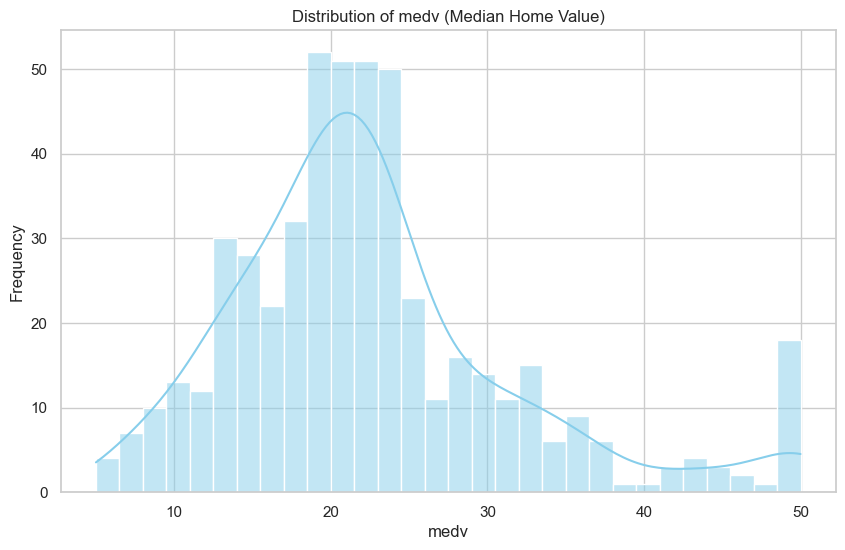

In [140]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Visualizing the distribution of the dependent variable 'medv' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['medv'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of medv (Median Home Value)')
plt.xlabel('medv')
plt.ylabel('Frequency')
plt.show()

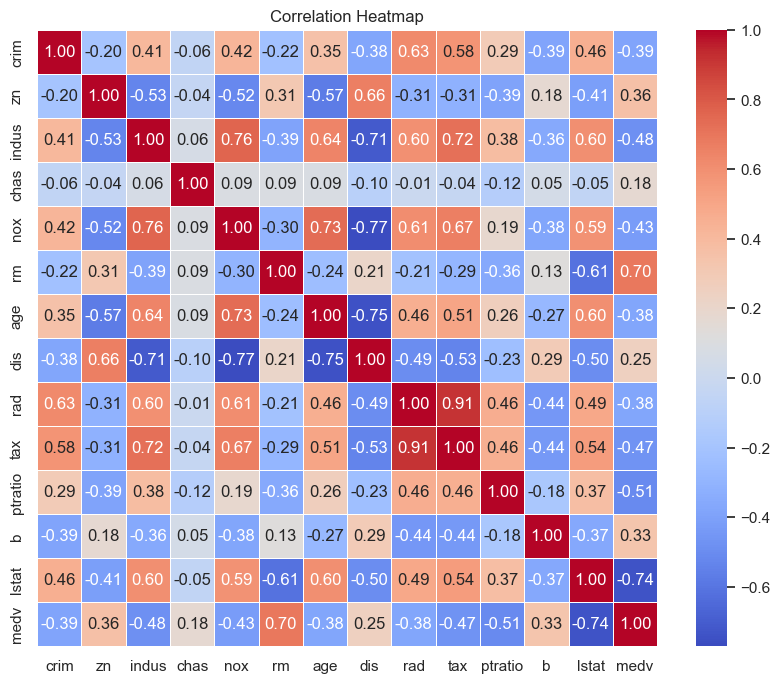

In [141]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(boston_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [142]:
# Split the independent variables from the dependent variable
y = boston_df["medv"].values # dependent variable

X = boston_df[["rm","lstat"]].values # independent variable

# reshaping data
y = y.reshape(-1,1)
X = X.reshape(-1,2)


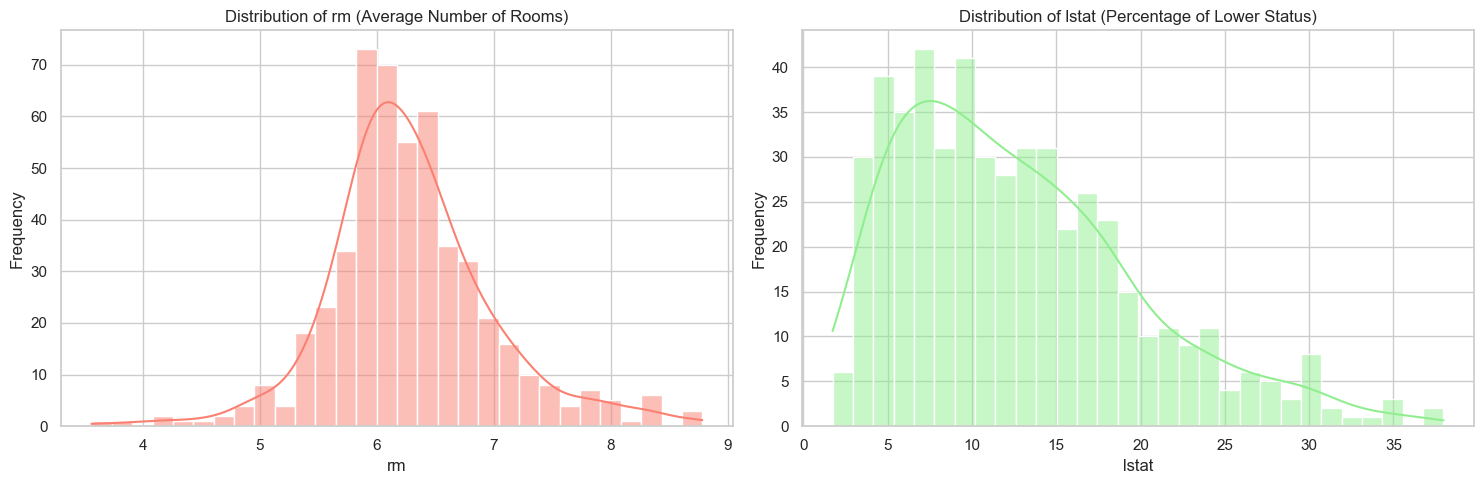

In [143]:
# Explore relationships between the independent and dependent variables

# Visualizing the distribution of independent variables 'rm' and 'lstat'
plt.figure(figsize=(15, 5))

# Distribution of 'rm' (average number of rooms per dwelling)
plt.subplot(1, 2, 1)
sns.histplot(boston_df['rm'], bins=30, kde=True, color='salmon')
plt.title('Distribution of rm (Average Number of Rooms)')
plt.xlabel('rm')
plt.ylabel('Frequency')

# Distribution of 'lstat' (percentage of lower status of the population)
plt.subplot(1, 2, 2)
sns.histplot(boston_df['lstat'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of lstat (Percentage of Lower Status)')
plt.xlabel('lstat')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

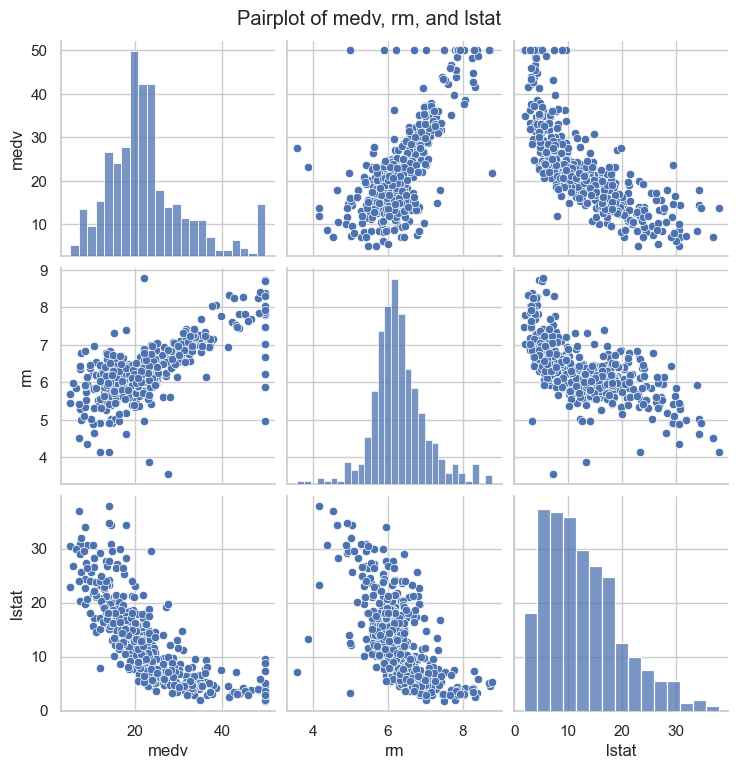

In [144]:
# Explore relationships between variables using a pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(boston_df[['medv', 'rm', 'lstat']])
plt.suptitle('Pairplot of medv, rm, and lstat', y=1.02)
plt.show()


In [145]:
# Create a training and test set with a 75:25 split ratio
rseed = 3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=rseed)

In [146]:
# Build a multiple linear regression model using 'rm' and 'lstat'

model = LinearRegression()

model.fit(X_train,y_train)


LinearRegression()

In [147]:
# Print the model intercept and coefficients

print(f"\n intercept \n {model.intercept_} \n coefficients \n {model.coef_}")


 intercept 
 [1.67346404] 
 coefficients 
 [[ 4.67767221 -0.67108747]]


In [148]:
# Generate predictions for the test set
y_predictions = model.predict(X_test)
y_predictions

array([[37.56080041],
       [22.07199427],
       [25.02149042],
       [31.07148631],
       [25.83564122],
       [23.15240935],
       [19.63056636],
       [ 8.60606718],
       [25.01969305],
       [11.1755346 ],
       [ 9.63539366],
       [31.07025071],
       [33.02162457],
       [24.55727322],
       [ 9.17129405],
       [ 8.93471027],
       [22.48287446],
       [16.76745829],
       [16.98629882],
       [25.51110029],
       [30.51997205],
       [35.54356991],
       [25.92556625],
       [25.82552746],
       [12.64024421],
       [28.34644968],
       [18.4542119 ],
       [16.4529823 ],
       [23.30319638],
       [21.83245249],
       [18.36295638],
       [32.72039361],
       [22.01272749],
       [24.50029473],
       [17.37578121],
       [17.17923372],
       [25.37617664],
       [32.91753244],
       [22.76086763],
       [26.65973526],
       [17.78182351],
       [ 7.99669501],
       [17.48440387],
       [20.25572697],
       [22.68184708],
       [28

In [149]:
# Evaluate the model
# MSE
mse = mean_squared_error(y_test, y_predictions)
print("Mean Squared Error:", round(mse, 4))

# R squared score
print ("R2 Score:", round (model.score(X_test, y_test), 4))


Mean Squared Error: 26.3018
R2 Score: 0.6755


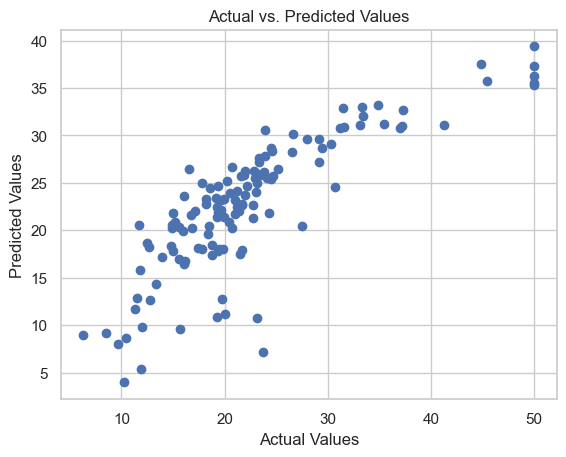

In [150]:
# Generate a plot

# Generate a scatter plot of predicted vs. actual values
plt.scatter(y_test, y_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

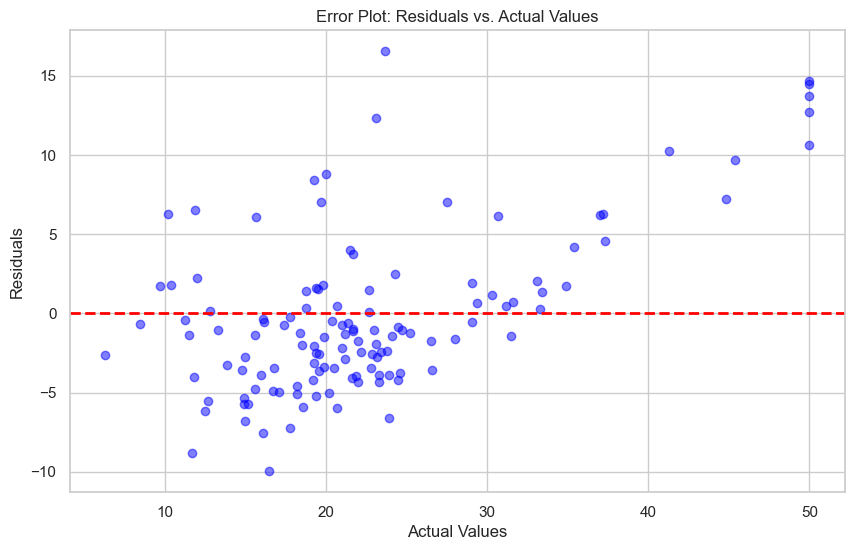

In [151]:
# Calculate residuals (differences between actual and predicted values)
residuals = y_test - y_predictions

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.title('Error Plot: Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.show()

In [152]:
# Print the coefficients
model.coef_

array([[ 4.67767221, -0.67108747]])

**Interpret coefficients in the context of the prediction:**

For every one-unit increase in the average number of rooms (rm), the predicted median home value (medv) is expected to increase by approximately 4.67 units, holding other variables constant.

For every one-unit increase in the percentage of lower status of the population (lstat), the predicted median home value (medv) is expected to decrease by approximately 0.67 units, holding other variables constant.
This implies an inverse relationship; areas with a higher percentage of lower-status population tend to have lower median home values.



**Summarise findings**
The positive coefficient for rm suggests a positive correlation between the average number of rooms and median home value.
The negative coefficient for lstat suggests a negative correlation between the percentage of lower status of the population and median home value.